In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Задача 1.**
### 1.1. Скачать данные.

In [2]:
house_data = pd.read_csv(r'C:\Users\Julia\Documents\Обучение\Python\Python для аналитиков\Семинар 2\kc-house-data.csv',
                         encoding='Windows-1251')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2. Изучите стоимости недвижимости.

In [3]:
house_data['price'].min(), house_data['price'].max()

(75000.0, 7700000.0)

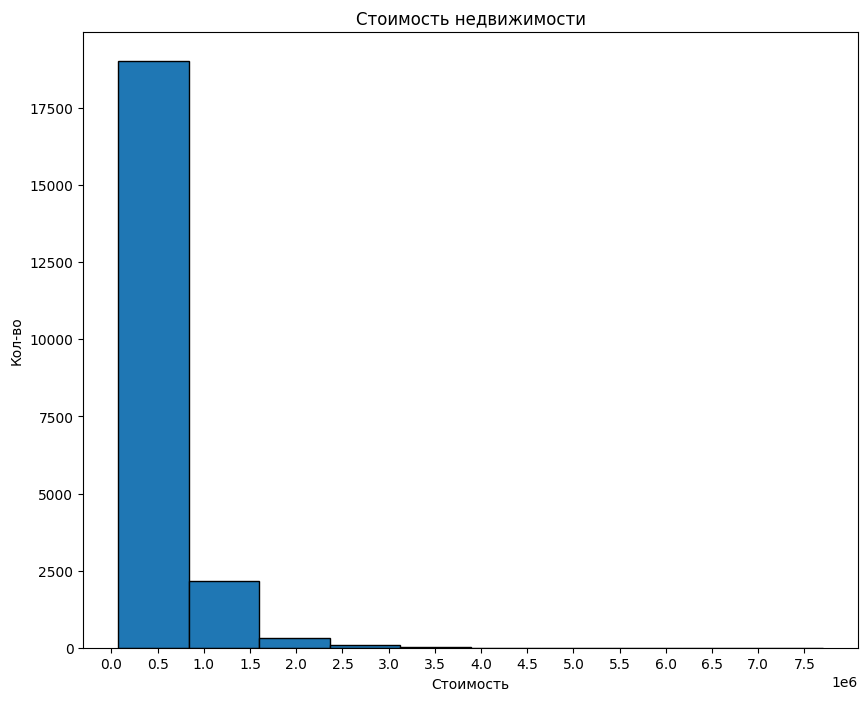

In [4]:
plt.figure(figsize=(10, 8))
plt.hist(house_data['price'], edgecolor='black')

plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во')
plt.xticks(range(0, 8000000, 500000))
plt.show()

### 1.3. Изучите распределение квадратуры жилой.

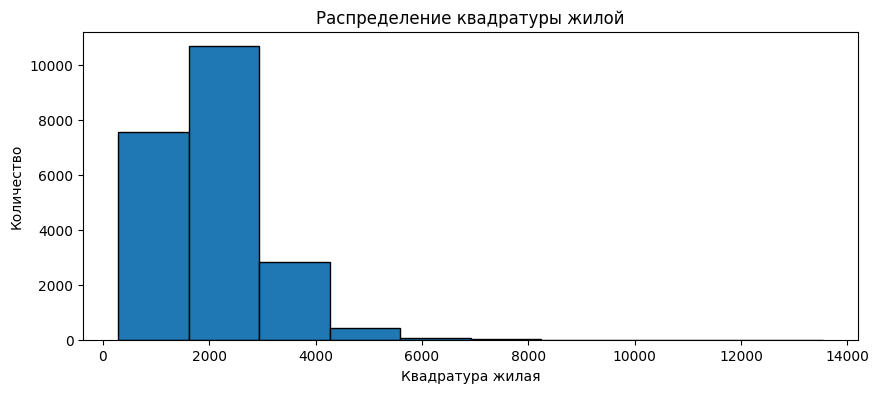

In [5]:
plt.figure(figsize=(10, 4))
plt.hist(house_data['sqft_living'], edgecolor='black')

plt.title('Распределение квадратуры жилой')
plt.xlabel('Квадратура жилая')
plt.ylabel('Количество')
plt.show()

### 1.4. Изучите распределение года постройки.

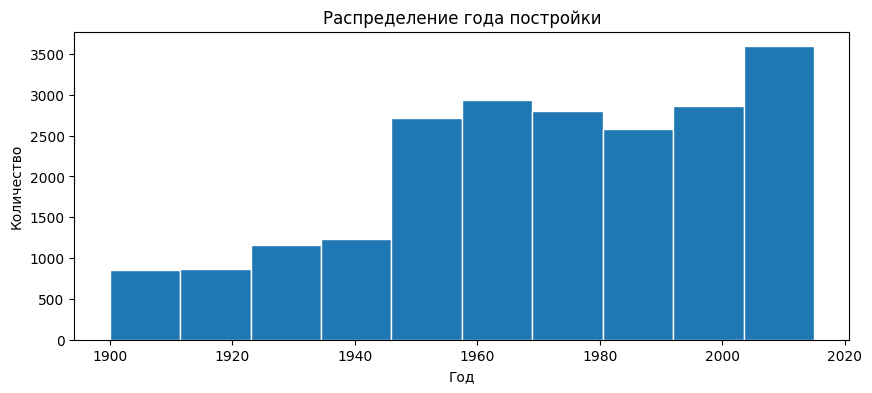

In [6]:
plt.figure(figsize=(10, 4))
plt.hist(house_data['yr_built'], edgecolor='white')

plt.title('Распределение года постройки')
plt.xlabel('Год')
plt.ylabel('Количество');

## **Задача 2.**
### 2.1. Изучите распределение домов от наличия вида на набережную.

In [7]:
data1 = house_data['waterfront'].value_counts()
data1.index = ['no', 'yes']
data1

no     21450
yes      163
Name: count, dtype: int64

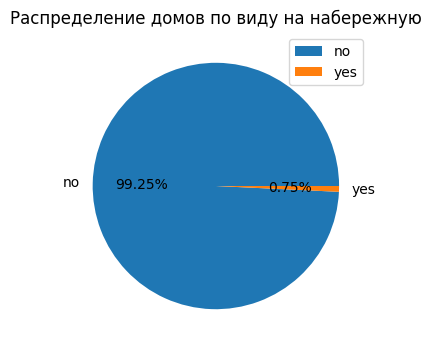

In [8]:
plt.figure(figsize=(8, 4))
plt.pie(data1.values, labels=data1.index, autopct='%1.2f%%')
plt.title('Распределение домов по виду на набережную')
plt.legend(data1.index, loc='upper right')
plt.show()

### 2.2. Изучите распределение этажей домов.

In [9]:
data2 = house_data['floors'].value_counts()
data2

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

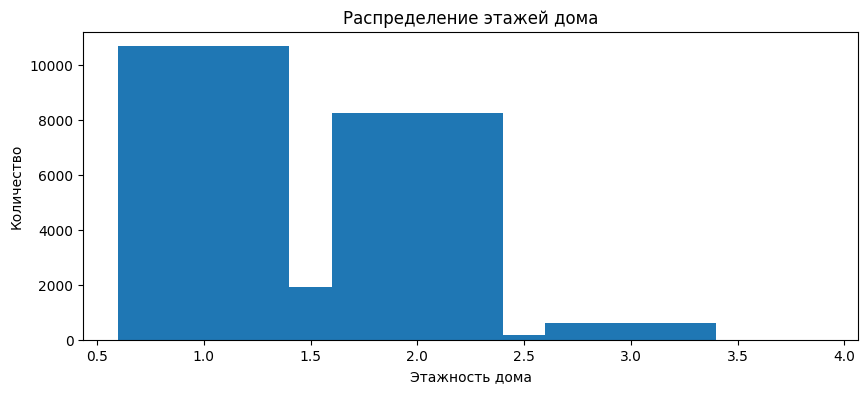

In [10]:
plt.figure(figsize=(10, 4))
plt.bar(data2.index, data2.values)
plt.title('Распределение этажей дома')
plt.xlabel('Этажность дома')
plt.ylabel('Количество')
plt.show()

### 2.3. Изучите распределение состояния домов.

In [11]:
data3 = house_data['condition'].value_counts().sort_index(ascending=True)
data3

condition
1       30
2      172
3    14031
4     5679
5     1701
Name: count, dtype: int64

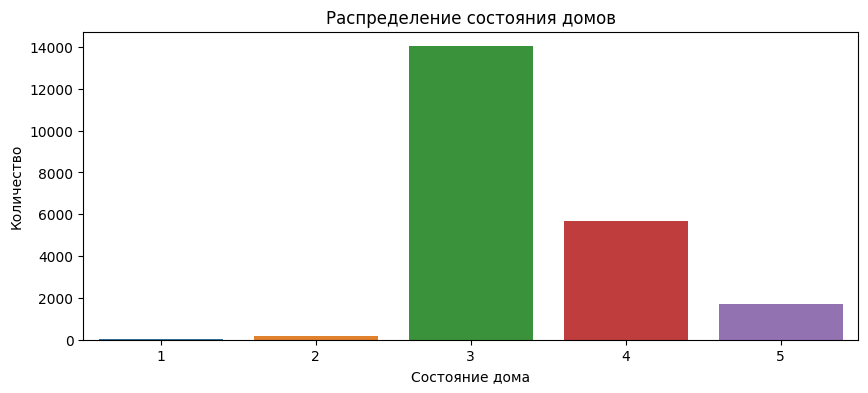

In [12]:
plt.figure(figsize=(10, 4))

sns.barplot(x=data3.index, y=data3.values)

plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Количество');


## **Задача 3.**
### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


### 1. Гипотеза о влиянии вида на стоимость дома: чем лучше вид, тем дороже дом.

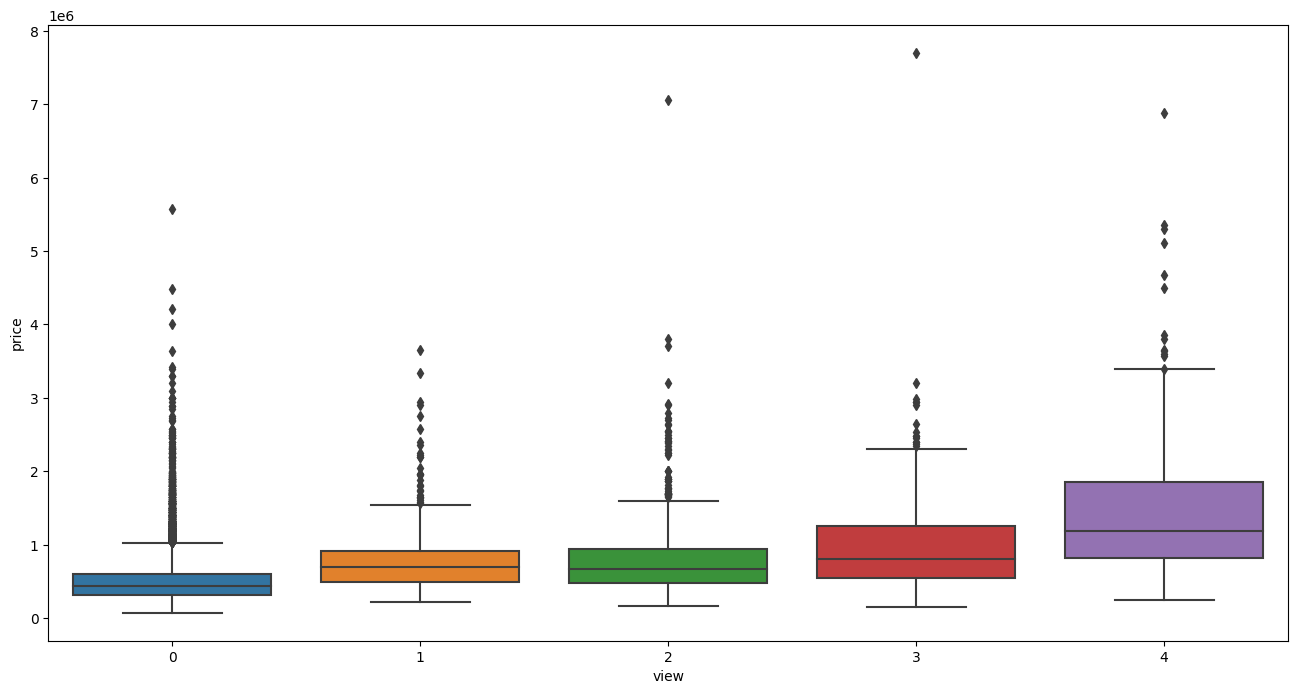

In [27]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=house_data['view'], y=house_data['price']);

### 1.1 Гипотеза в целом подтверждается. На графике видно, что дома с видом 3 и 4 стоят дороже. Однако для домов с видом 0 выявлен очень большой выброс по цене. Делаем вывод, что на цену этих домов влияет что-то еще кроме вида.

### 2. Гипотеза о влиянии этажности на стоимость дома: чем больше этажей, тем дороже дом.

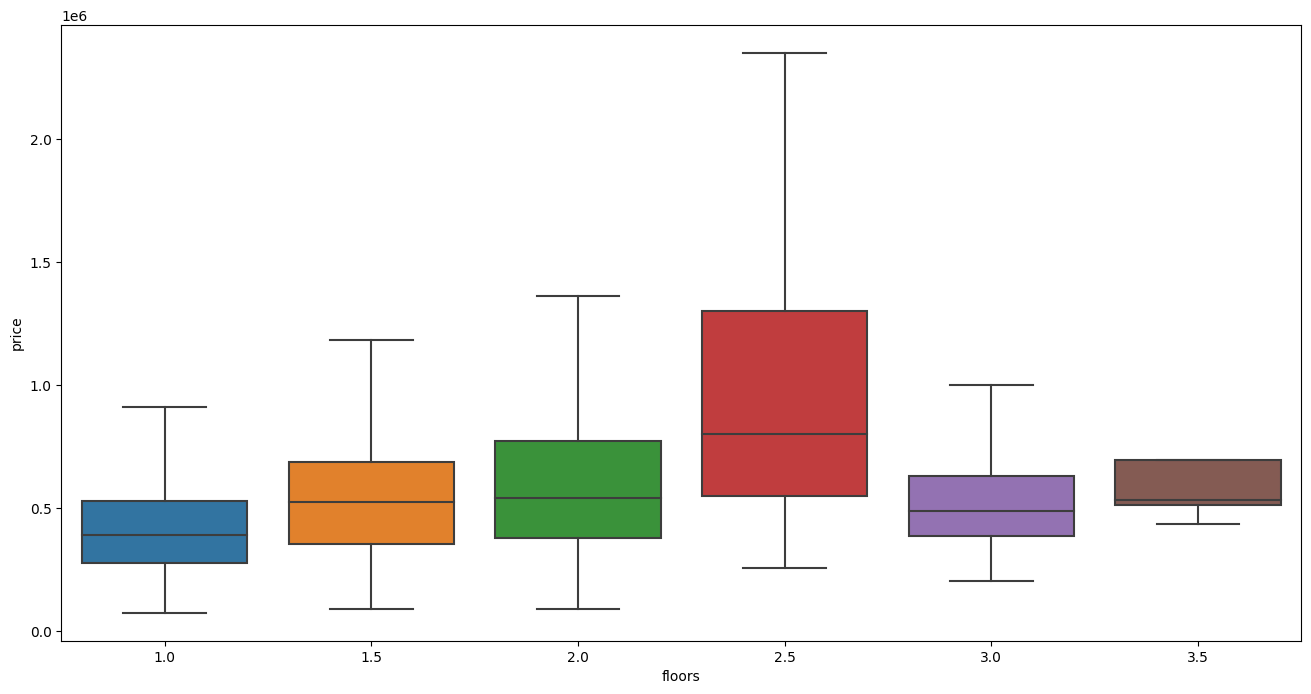

In [30]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=house_data['floors'], y=house_data['price'], showfliers=False);

### 2.1 На графике видно, что этажность не сильно влияет на стоимость дома, за исключением этажности 2,5.

### 3. Гипотеза о влиянии вида на набережную на стоимость дома: дом дороже, если есть вид на набережную.

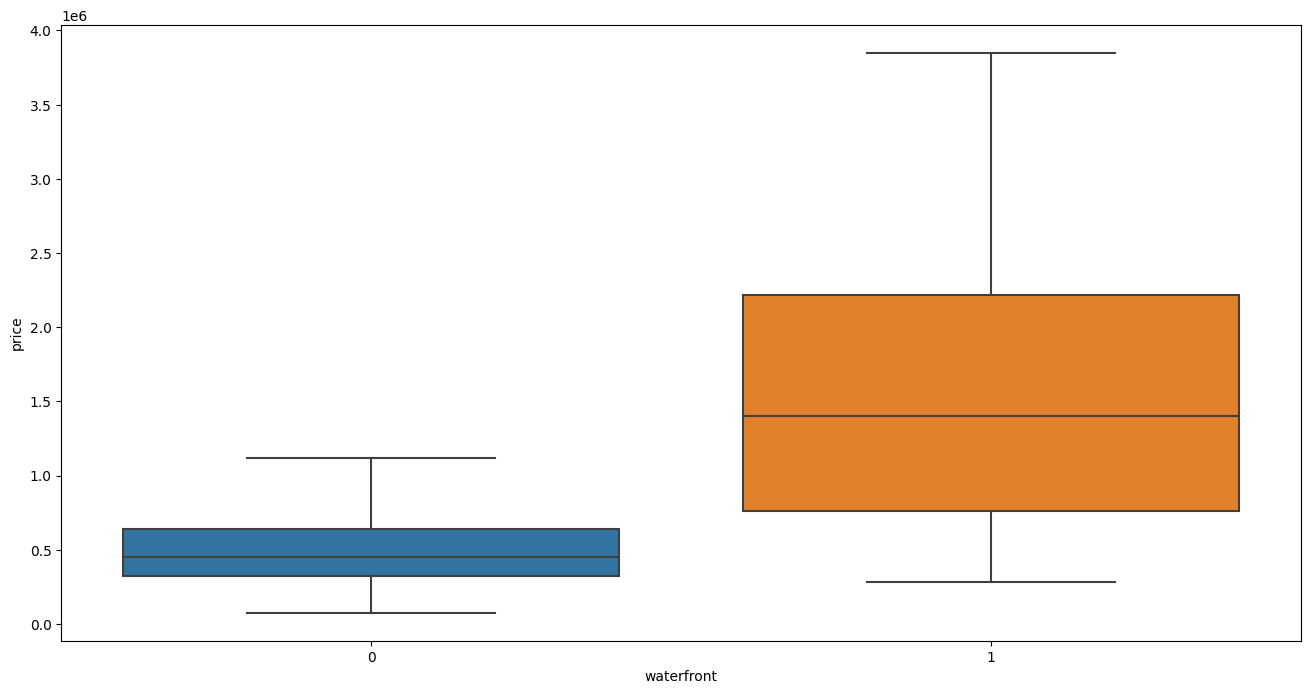

In [35]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=house_data['waterfront'], y=house_data['price'], showfliers=False);


### 3.1 Гипотеза подтверждается.

### 4. Гипотеза о влиянии широты и долготы на стоимость дома.

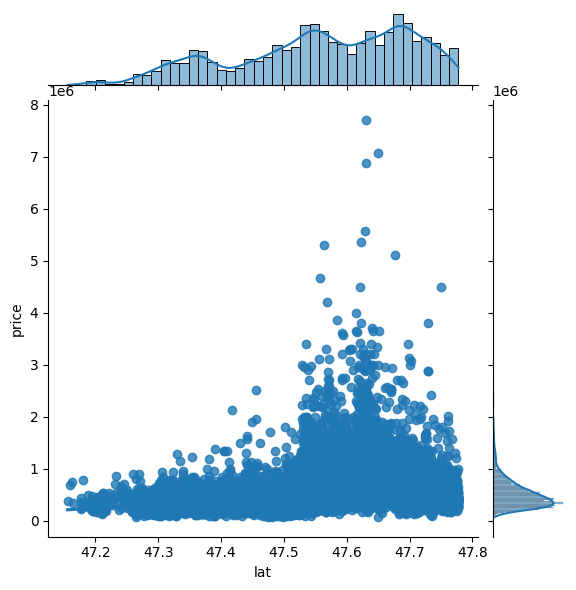

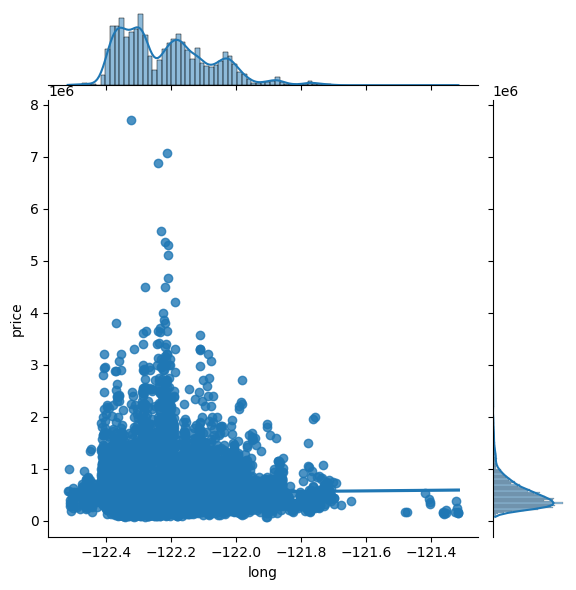

In [36]:
lat = sns.jointplot(x=house_data['lat'], y=house_data['price'], kind='reg')
long = sns.jointplot(x=house_data['long'], y=house_data['price'], kind='reg');

### 4.1 Закономерности не выявлены.

### 5. Рассмотрим распределение вещественных признаков.

In [16]:
house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

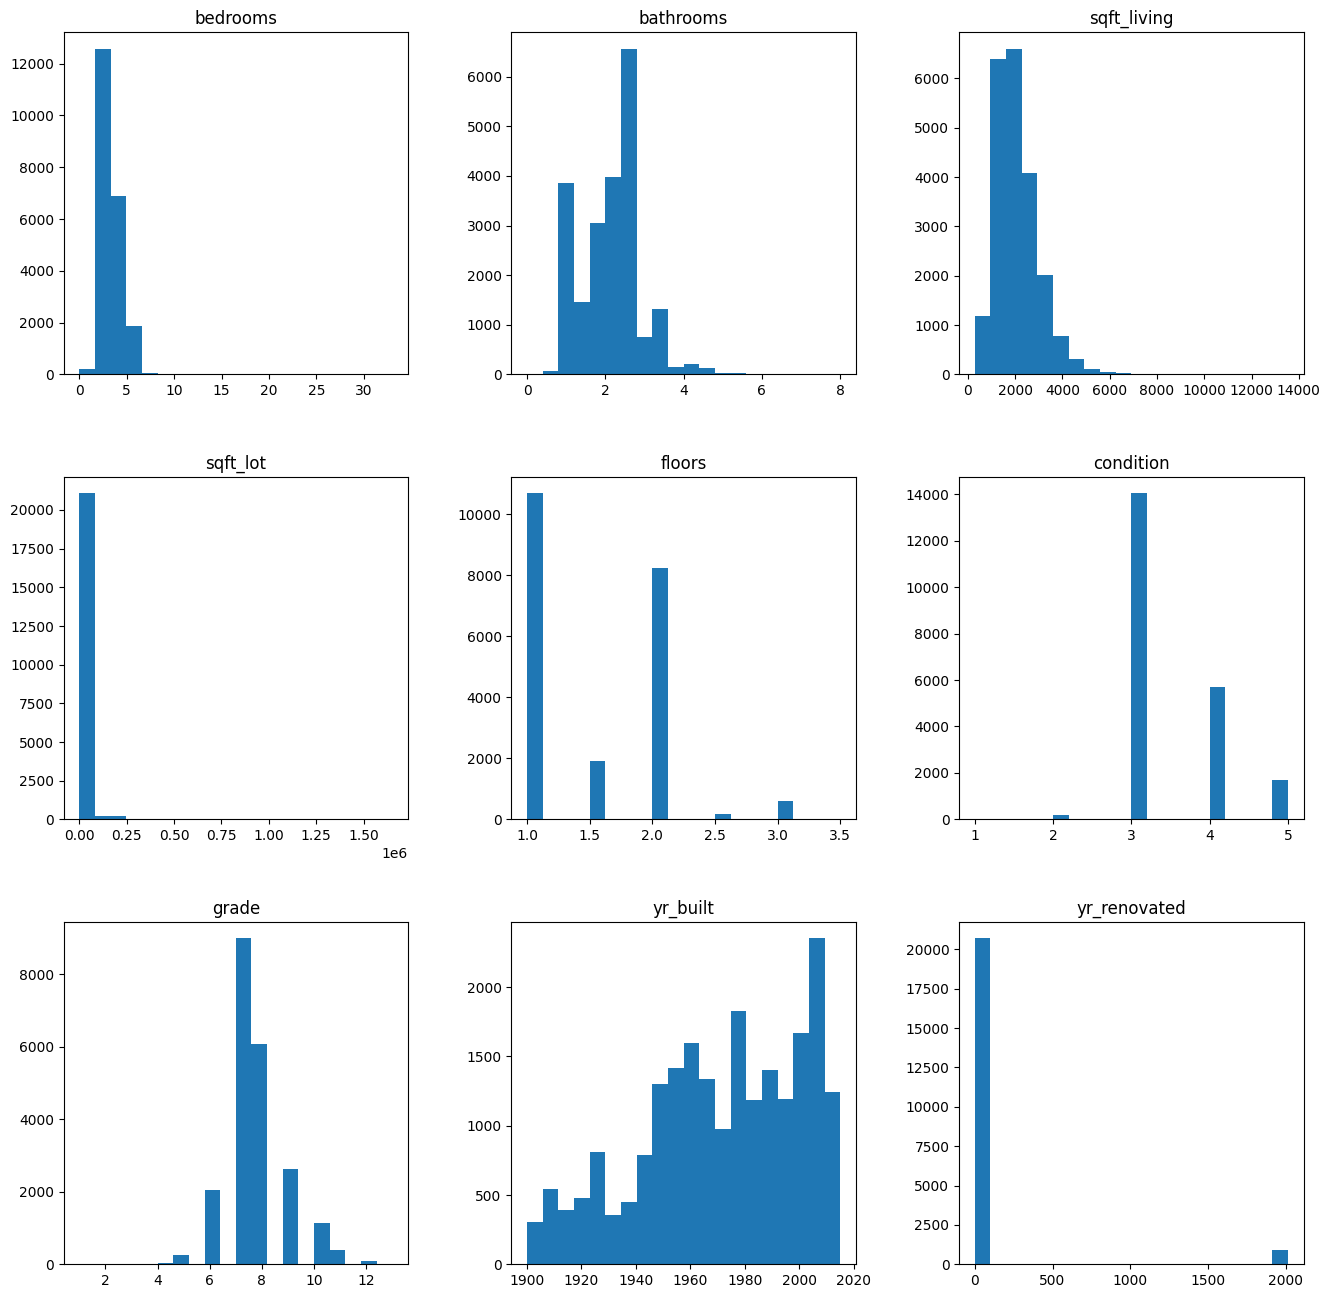

In [39]:
df_num_features = house_data.select_dtypes(include=['int64', 'float64'])
df_num_features.drop(['id', 'price', 'sqft_above', 'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 
                      'lat', 'long','view', 'waterfront'], axis=1, inplace=True)

df_num_features.hist(figsize=(16, 16), bins=20, grid=False);
